In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [63]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/cvinnn/Data-Mining/refs/heads/main/Week%208/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [66]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Histogram ini menunjukkan frekuensi pelanggan di berbagai rentang pendapatan. Sebagian besar pelanggan berada di rentang pendapatan rendah hingga menengah, menunjukkan keberagaman ekonomi. Wawasan ini membantu dalam menargetkan strategi pemasaran secara efektif.


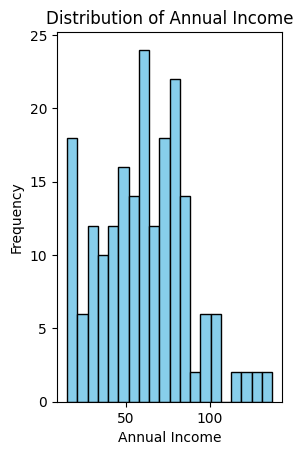

In [67]:
# make an insightful visualization and explain
plt.subplot(1, 2, 1)  
plt.hist(df['Annual Income'], bins=20, color='skyblue', edgecolor='black')  
plt.title('Distribution of Annual Income')  
plt.xlabel('Annual Income')  
plt.ylabel('Frequency') 

print("Histogram ini menunjukkan frekuensi pelanggan di berbagai rentang pendapatan. Sebagian besar pelanggan berada di rentang pendapatan rendah hingga menengah, menunjukkan keberagaman ekonomi. Wawasan ini membantu dalam menargetkan strategi pemasaran secara efektif.")

Histogram ini menampilkan skor pengeluaran pelanggan dari 1 hingga 100. Ini mengungkapkan bahwa meskipun beberapa pelanggan menghabiskan banyak, banyak juga yang memiliki skor pengeluaran rendah. Ini menunjukkan bahwa pendapatan tidak selalu berkorelasi dengan perilaku pengeluaran, menyoroti perlunya pendekatan pemasaran yang disesuaikan.


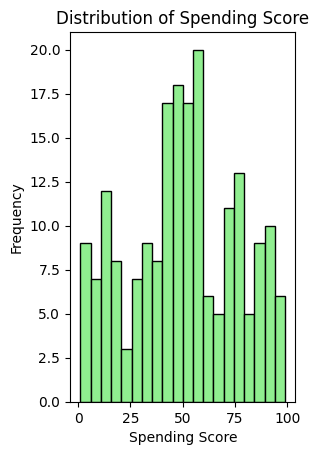

In [68]:
# make an insightful visualization and explain
plt.subplot(1, 2, 2)  
plt.hist(df['Spending Score'], bins=20, color='lightgreen', edgecolor='black')  
plt.title('Distribution of Spending Score')  
plt.xlabel('Spending Score')  
plt.ylabel('Frequency')  
print("Histogram ini menampilkan skor pengeluaran pelanggan dari 1 hingga 100. Ini mengungkapkan bahwa meskipun beberapa pelanggan menghabiskan banyak, banyak juga yang memiliki skor pengeluaran rendah. Ini menunjukkan bahwa pendapatan tidak selalu berkorelasi dengan perilaku pengeluaran, menyoroti perlunya pendekatan pemasaran yang disesuaikan.")

## Data Preprocessing

For this case study, we only use income and spending score

In [69]:
# create new dataframe that consist only annual income and spending score
df_as = df.iloc[:, -2:]
df_as.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [70]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_as = pd.DataFrame(scaler.fit_transform(df_as), columns=["Annual Income", "Spending Score"])

df_as.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [71]:
# get stastical information on the new dataset
df_as.describe()

,Annual Income,Spending Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

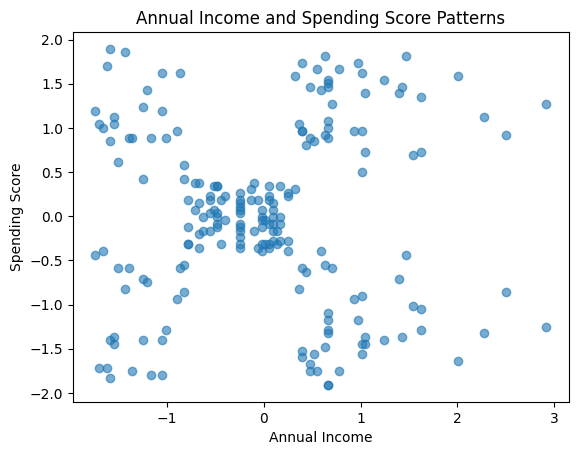

In [72]:
# Visualize the position
plt.scatter(df_as["Annual Income"], df_as["Spending Score"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Score Patterns")
plt.show()

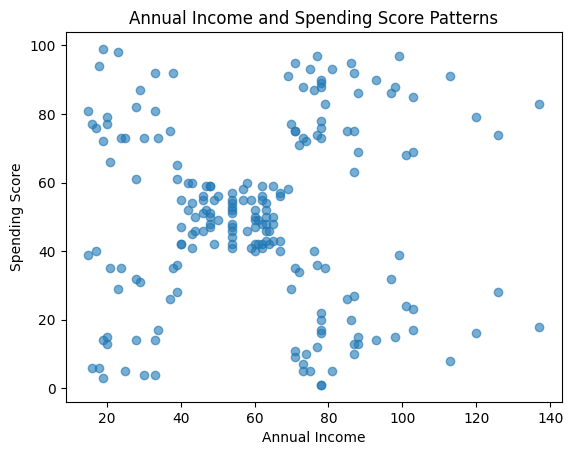

In [73]:
# Visualize the position using the original scale
plt.scatter(df["Annual Income"], df["Spending Score"], alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Annual Income and Spending Score Patterns")
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [74]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_as)
    sse.append(kmeans.inertia_)

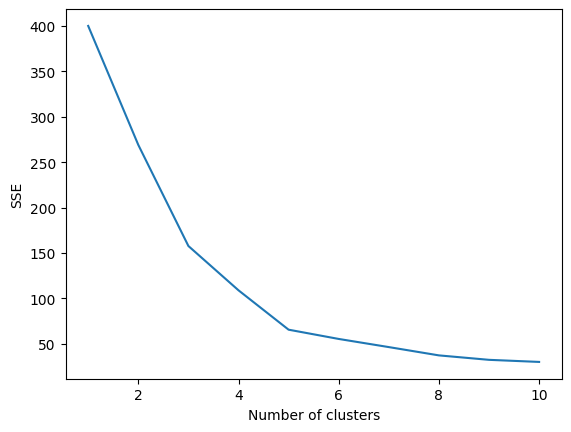

In [75]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [76]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for your model is", kneedle.elbow)

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [77]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_as)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

C:\Users\Cevin-Predator\AppData\Local\Temp\ipykernel_23540\3567171287.py:5: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df_as, s = 60)


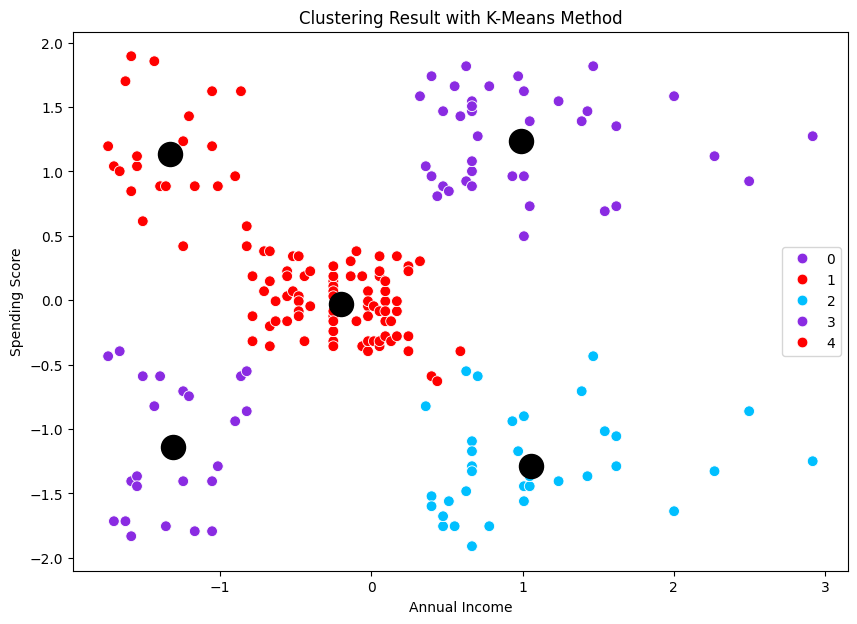

In [78]:
# visualize the result using scater chart
import seaborn as sns
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Annual Income", y = "Spending Score", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df_as, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [81]:
# Inverse transform the scaled data to get the original values

df_as = pd.DataFrame(scaler.inverse_transform(df_as), columns=["Annual Income", "Spending Score"])

In [82]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_as.groupby(y_pred).agg({'Annual Income': ['mean', 'std', 'min', 'max'],
                                              'Spending Score': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Annual Income                         Spending Score                   \
                 mean        std   min    max           mean        std   min   
cluster                                                                         
0           26.304348   7.893811  15.0   39.0      20.913043  13.017167   3.0   
1           25.727273   7.566731  15.0   39.0      79.363636  10.504174  61.0   
2           88.200000  16.399067  70.0  137.0      17.114286   9.952154   1.0   
3           86.538462  16.312485  69.0  137.0      82.128205   9.364489  63.0   
4           55.296296   8.988109  39.0   76.0      49.518519   6.530909  34.0   

               
          max  
cluster        
0        40.0  
1        99.0  
2        39.0  
3        97.0  
4        61.0

Implikasi:
Ada 3 cluster yang dibentuk
- Cluster 0: orang yang mempunyai Annual Income $15k-$69k dan mempunyai Spending Score 26-99
- Cluster 1: orang yang mempunyai Annual Income $16k-$137k dan mempunyai Spending Score 1-40
- Cluster 2: orang yang mempunyai Annual Income $69k-$137k dan mempunyai Spending Score 63-97

Kesimpulan:
- Cluster 0: Fokus pada produk dengan variasi harga dan fleksibilitas penawaran.
- Cluster 1: Tawarkan paket bundling dan promosi untuk produk yang ekonomis.
- CLuster 2: Arahkan pada produk premium dan tawaran eksklusif.

<write here>